<img src="https://camo.githubusercontent.com/9f7c69771104a2df48a040b897a44ad5387f07f77e1e7e5159e68e874fdf8c7f/68747470733a2f2f7777772e6869742e61632e696c2f2e75706c6f61642f61636164656d69632d656e7472657072656e657572736869702f697269732f706172746e6572732f7368656e6b61724c6f676f2e6a7067">

# Final project 
## Lecturer: Eyal Nussbaum
## Student: Lucas Kujawski - 00331506

## 1. Intro
In the following notebook, we will analyse a dataset describing League of Legends matches.

The dataset contains around 65K rows, containing on each:

* ##### gameId: number
Unique Riot game ID.

* ##### gameDuraton: number
Game Duration(seconds)

* ##### <span style="color:blue">blueWardPlaced</span>/<span style="color:red">redWardPlaced</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team ward placed counts(Number of warding totems)

* ##### <span style="color:blue">blueWardkills</span>/<span style="color:red">redWardkills</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team ward killed counts(Number of warding killed)

* ##### <span style="color:blue">blueTotalMinionKills</span>/<span style="color:red">redTotalMinionKills</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team kill minion counts (includign jungle)

* ##### <span style="color:blue">blueJungleMinionKills</span>/<span style="color:red">redJungleMinionKills</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team kill jungle minion counts

* ##### <span style="color:blue">blueTotalHeal</span>/<span style="color:red">redTotalHeal</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team heal amounts

* ##### FirstBlood: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team got the first kill of an enemy champion

* ##### FirstTower: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team first destroyed an enemy turret

* ##### FirstBaron: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team first killed Baron Nashor

* ##### FirstDragon: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team first killed a Dragon

* ##### win: Target Class - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Who won the game


In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install scipy
!pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pydotplus
from matplotlib import ticker


You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('lol3.csv')

## 2. Initial data analysis

In [3]:
df.head()

gameId  gameDuraton  blueWardPlaced  blueWardkills  \
0  4241678498         2098             129           39.0   
1  4233222221         1686              72           26.0   
2  4233113995         1588              79           39.0   
3  4229230455         1126              43           20.0   
4  4228244819         1262              49           16.0   

   blueTotalMinionKills  blueJungleMinionKills  blueTotalHeal  redWardPlaced  \
0                   774                    226          24718             96   
1                   601                    136          20503             72   
2                   613                    157          28612             76   
3                   486                    115          17630             47   
4                   509                    129          13040             43   

   redWardkills  redTotalMinionKills  redJungleMinionKills  redTotalHeal  \
0           NaN                832.0                 205.0       65312.0   
1          29.0                  NaN                 214.0       31415.0   
2          28.0                  NaN                   NaN       27846.0   
3          19.0                461.0                  92.0           NaN   
4          17.0                506.0                 113.0       17891.0   

    win FirstBlood FirstTower FirstBaron FirstDragon  
0   Red        Red        Red       Blue        Blue  
1   Red        NaN       Blue        Red         Red  
2  Blue       Blue       Blue       Blue         Red  
3  Blue        Red       Blue        Red        Blue  
4  Blue        Red        Red        Red        Blue

In [4]:
df.describe()

gameId   gameDuraton  blueWardPlaced  blueWardkills  \
count  6.589600e+04  65896.000000    65896.000000   59289.000000   
mean   4.172854e+09   1427.961591       53.617564      19.819511   
std    7.889291e+07    429.784566       31.231714      15.018380   
min    3.191955e+09    132.000000        0.000000       0.000000   
25%    4.144505e+09   1121.000000       33.000000       8.000000   
50%    4.194611e+09   1414.000000       54.000000      18.000000   
75%    4.224057e+09   1724.000000       74.000000      29.000000   
max    4.257022e+09   3301.000000      230.000000     118.000000   

       blueTotalMinionKills  blueJungleMinionKills  blueTotalHeal  \
count          65896.000000           65896.000000   65896.000000   
mean             498.855333             122.692303   24462.290974   
std              179.961166              67.143071   15150.270579   
min                0.000000               0.000000       0.000000   
25%              379.000000              81.000000   13446.750000   
50%              515.000000             126.000000   21448.000000   
75%              623.000000             169.000000   32149.000000   
max             1315.000000             400.000000  261707.000000   

       redWardPlaced  redWardkills  redTotalMinionKills  redJungleMinionKills  \
count   65896.000000  50180.000000         59340.000000          54098.000000   
mean       53.786421     19.566780           503.945383            124.647713   
std        31.459582     14.823881           183.780133             69.093028   
min         0.000000      0.000000             0.000000              0.000000   
25%        33.000000      8.000000           381.000000             82.000000   
50%        54.000000     18.000000           521.000000            128.000000   
75%        74.000000     29.000000           632.000000            171.000000   
max       226.000000    117.000000          1287.000000           1003.000000   

        redTotalHeal  
count   63355.000000  
mean    24838.933454  
std     15314.030768  
min         0.000000  
25%     13686.000000  
50%     21873.000000  
75%     32680.000000  
max    206758.000000

In [5]:
#definitions
original_numerical_columns = ['blueWardPlaced', 'blueWardkills', 'blueTotalMinionKills', 'blueJungleMinionKills',
               'blueTotalHeal', 'redWardPlaced', 'redWardkills', 'redTotalMinionKills',
               'redJungleMinionKills', 'redTotalHeal']
int_columns = ['blueWardPlaced', 'blueWardkills', 'blueTotalMinionKills', 'blueJungleMinionKills',
               'blueTotalHeal', 'redWardPlaced', 'redWardkills', 'redTotalMinionKills',
               'redJungleMinionKills', 'redTotalHeal']
milestones_columns = ['FirstBlood', 'FirstTower', 'FirstBaron', 'FirstDragon']
categorical_columns = milestones_columns + ['win']
team_columns = ['blueWardPlaced', 'blueWardkills', 'blueTotalMinionKills', 'blueJungleMinionKills',
               'blueTotalHeal', 'redWardPlaced', 'redWardkills', 'redTotalMinionKills',
               'redJungleMinionKills', 'redTotalHeal']
BLUE = 0
RED = 1

### 2.1 Feature statistical analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65896 entries, 0 to 65895
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameId                 65896 non-null  int64  
 1   gameDuraton            65896 non-null  int64  
 2   blueWardPlaced         65896 non-null  int64  
 3   blueWardkills          59289 non-null  float64
 4   blueTotalMinionKills   65896 non-null  int64  
 5   blueJungleMinionKills  65896 non-null  int64  
 6   blueTotalHeal          65896 non-null  int64  
 7   redWardPlaced          65896 non-null  int64  
 8   redWardkills           50180 non-null  float64
 9   redTotalMinionKills    59340 non-null  float64
 10  redJungleMinionKills   54098 non-null  float64
 11  redTotalHeal           63355 non-null  float64
 12  win                    65896 non-null  object 
 13  FirstBlood             50036 non-null  object 
 14  FirstTower             63208 non-null  object 
 15  Fi

**We see that there are many null values in the following columns:**

    1. blueWardkills
    2. redWardkills
    3. redTotalMinionKills
    4. redJungleMinionKills
    5. FirstBlood
    6. FirstBaron

### 2.2 Data fixes: 

* We might have repeated values in gameId, let's remove them. Then lets set gameId as index

In [8]:
df.drop_duplicates(subset='gameId', keep="first", inplace=True)
df.set_index('gameId')
df.drop(['gameId'], inplace=True, axis=1)

* In order to replace integer NA or 0 values, we will analyse their relation with other columns:

In [9]:
df[int_columns] = df[int_columns].replace([0], np.nan)

In [10]:
def replace_na(_df, x, y):
    int_df = _df[int_columns]
    non_NA_int_df = int_df[int_df > 0].dropna(inplace=False)
    relation = (non_NA_int_df[x]/non_NA_int_df[y]).mean()
    def relation_replace(row):
        if pd.isna(row[x]) and not pd.isna(row[y]):
            row[x] = row[y] * relation
        return row
    return _df.apply(relation_replace, axis=1)
df = replace_na(df,'blueWardkills', 'redWardPlaced')
df = replace_na(df,'redWardkills', 'blueWardPlaced')
df = replace_na(df,'redTotalMinionKills', 'redJungleMinionKills')
df = replace_na(df,'redJungleMinionKills', 'redTotalMinionKills')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65876 entries, 0 to 65895
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameDuraton            65876 non-null  int64  
 1   blueWardPlaced         59583 non-null  float64
 2   blueWardkills          59394 non-null  float64
 3   blueTotalMinionKills   65873 non-null  float64
 4   blueJungleMinionKills  59401 non-null  float64
 5   blueTotalHeal          65872 non-null  float64
 6   redWardPlaced          59394 non-null  float64
 7   redWardkills           59583 non-null  float64
 8   redTotalMinionKills    64125 non-null  float64
 9   redJungleMinionKills   64125 non-null  float64
 10  redTotalHeal           63324 non-null  float64
 11  win                    65876 non-null  object 
 12  FirstBlood             50021 non-null  object 
 13  FirstTower             63189 non-null  object 
 14  FirstBaron             59217 non-null  object 
 15  Fi

* We remove unconsistent rows:
1. number of ward killed of a team > number of ward placed of the adversary
2. minion jungle kills of a team > total jungle kills of a team

In [12]:
print("Removing {} rows".format(len(df[df['blueWardkills'] > df['redWardPlaced']])))
print("Removing {} rows".format(len(df[df['redWardkills'] > df['blueWardPlaced']])))
print("Removing {} rows".format(len(df[df['redJungleMinionKills'] > df['redTotalMinionKills']])))
print("Removing {} rows".format(len(df[df['blueJungleMinionKills'] > df['blueTotalMinionKills']])))

df = df[df['blueWardkills'] <= df['redWardPlaced']]
df = df[df['redWardkills'] <= df['blueWardPlaced']]
df = df[df['redJungleMinionKills'] <= df['redTotalMinionKills']]
df = df[df['blueJungleMinionKills'] <= df['blueTotalMinionKills']]

Removing 0 rows
Removing 0 rows
Removing 53 rows
Removing 16 rows


* NA Values on win or FirstX invalidates the row as we can't analyse what happen on that game. We remove those lines
* We have only a few NA values on integer column. So we remove them

In [13]:
print("Removing {} rows".format(df.shape[0] - df.dropna(subset=int_columns, inplace=False).shape[0]))
df.dropna(subset=int_columns, inplace=True)

Removing 2240 rows


* We remove games shorter than a minute

In [14]:
df = df[df['gameDuraton'] > 60]

* Convert categorical values to lower case

In [15]:
df[categorical_columns] = df[categorical_columns].astype(str).apply(lambda x: x.str.lower())

### Data manipulation
**We will add and change some features so can understand better or analyze some features**

* We will convert seconds to minutes:

In [16]:
df['minutesDuration'] = (df['gameDuraton'] / 60).astype('int32')
df.drop(['gameDuraton'], axis=1, inplace=True)

* We want to analyze some winning behaviours without team knowledge. So we will create:
1. winnerKillsPerMinute
2. winnerTotalKills
3. winnerWardkillsPercentage

In [17]:
def winStats(row):
    if row['win'] == 'red':
        row['winnerKillsPerMinute'] = (row['redWardkills']/row['minutesDuration'])
        row['winnerTotalKills'] = row['redWardkills']
        row['winnerWardkillsPercentage'] = (row['redWardkills']/row['blueWardPlaced']) * 100
    else:
        row['winnerKillsPerMinute'] = row['blueWardkills']/row['minutesDuration']
        row['winnerTotalKills'] = row['blueWardkills']
        row['winnerWardkillsPercentage'] = (row['blueWardkills']/row['redWardPlaced']) * 100
    return row        
df = df.apply(winStats, axis=1)
int_columns = int_columns + ['winnerTotalKills', 'winnerWardkillsPercentage']

* Counts the times that winner was the first team to achieve the milestones

In [18]:
first_df = df.copy()
for column in milestones_columns:
    first_df['is{column}Winner'.format(column=column)] = (first_df['win'] ==  first_df['{column}'.format(column=column)])
    
first_columns = ['isFirstBloodWinner', 'isFirstTowerWinner', 'isFirstBaronWinner','isFirstDragonWinner']
first_df = first_df[first_columns].astype('int32')
df['winnerFirstTotal'] = first_df.sum(axis=1)
int_columns = int_columns + ['winnerFirstTotal']

* We have tree types of numeric columns: rates, percentage and counts. We've moved percentage to values from 0 to 100 so what's after the comma is not very relevant. In terms of counts, decimals can be treatead as noise. Therefore, we will convert percentages and counts as integer. 

In [19]:
df[int_columns] = df[int_columns].astype('int32')

We convert boolean fields (blue/red) into real boolean fields

In [20]:

df[milestones_columns] = df[milestones_columns].replace({'blue': BLUE, 'red': RED})
df = df.rename(columns={'FirstBlood': 'bool_FirstBlood', 'FirstTower': 'bool_FirstTower', 
                       'FirstBaron': 'bool_FirstBaron', 'FirstDragon': 'bool_FirstDragon'})
milestones_columns = ['bool_FirstBlood', 'bool_FirstTower', 'bool_FirstBaron', 'bool_FirstDragon']
categorical_columns = milestones_columns + ['win']
df["bool_win"] = df['win'] == 'red'

#### Summary: 

* Removed repeated games (based on gameId)
* Set gameId as index
* Filled NA/0 values based on their relations with other columns on blueWardkills, redWardkills, redTotalMinionKills and redJungleMinionKills
* Removed unconsistent rows:
1. number of ward killed of a team > number of ward placed of the adversary
2. minion jungle kills of a team > total jungle kills of a team
* Removed NA Values on win or FirstX as we can't analyse what happen on that game
* Removed NA values on integer column as there are only a few of them.
* Removed games shorter than a minute
* Converted categorical values to lower case
* Converted seconds to minutes
* Added the following columns:
1. winnerKillsPerMinute
2. winnerTotalKills
3. winnerWardkillsPercentage
* Add a column winnerFirstTotal that counts the times that winner was the first team to achieve the milestones
* Converted integer column to integer.
* Converted boolean fields (blue/red) into real boolean fields

**Resulting data set**

In [21]:
print("Number of rows after cleaning: {}".format(len(df)))
df.to_csv('lol_resulting_dataset.csv', index=False)
df.head()

Number of rows after cleaning: 55790


blueWardPlaced  blueWardkills  blueTotalMinionKills  blueJungleMinionKills  \
0             129             39                   774                    226   
1              72             26                   601                    136   
4              49             16                   509                    129   
5              59             28                   678                    167   
6              78             30                   669                    149   

   blueTotalHeal  redWardPlaced  redWardkills  redTotalMinionKills  \
0          24718             96            44                  832   
1          20503             72            29                  915   
4          13040             43            17                  506   
5          33304             61            21                  587   
6          15986             68            40                  628   

   redJungleMinionKills  redTotalHeal  ... bool_FirstBlood bool_FirstTower  \
0                   205         65312  ...               1               1   
1                   214         31415  ...             nan               0   
4                   113         17891  ...               1               1   
5                   142         23507  ...               0               1   
6                   160         27026  ...               1               1   

  bool_FirstBaron bool_FirstDragon  minutesDuration  winnerKillsPerMinute  \
0               0                0               34              1.305916   
1               1                1               28              1.035714   
4               1                0               21              0.761905   
5               0                1               27              1.037037   
6               1                1               28              1.428571   

   winnerTotalKills  winnerWardkillsPercentage  winnerFirstTotal  bool_win  
0                44                         34                 2      True  
1                29                         40                 2      True  
4                16                         37                 1     False  
5                28                         45                 2     False  
6                40                         51                 4      True  

[5 rows x 21 columns]

## 3. Exploratory Data Analysis

### 3.1 Feature correlation
Let's see correlation between columns

Text(0.5, 1.0, 'Correlation')

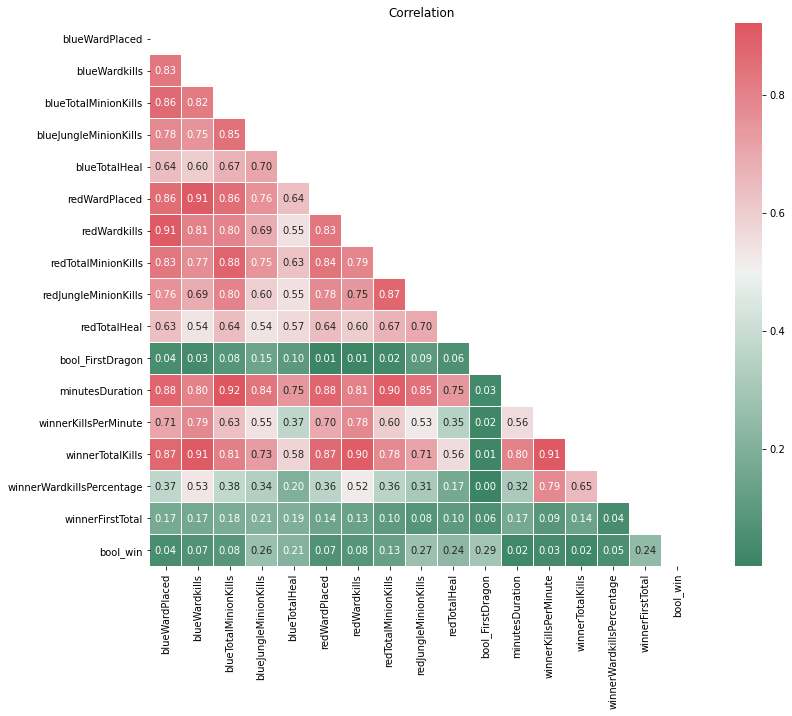

In [22]:
corr = df.corr().abs()
mask = np.triu(corr)
cmap = sns.diverging_palette(150, 10, as_cmap=True)
plt.figure(figsize = (15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.5, annot = True, fmt = '.2f', square=True, linewidths=.5).set_title("Correlation")

### Correlation conclusions:

1. MinutesDuration have a strong correlation with almost every numerical feature and this makes sense: all of them increase with time.
2. Win is not hardly correlated with any feature, but the most correlated features are: FirstDragon, redJungleMinionKills,blueJungleMinionKills, blueTotalHeal, winnerFirstTotal and redTotalHeal.


MinutesDuration have a strong correlation with almost every numerical feature and this makes sense: all of them increase with time: To see this, we will create some pivot tables.

**Every numerical feature grows with time**

In [23]:
pivot_df = df.copy()
pivot_df['minutesDuration'] = pd.qcut(pivot_df['minutesDuration'], 5)
pivot_table = np.round(pd.pivot_table(pivot_df, values=original_numerical_columns,
                              columns='minutesDuration', aggfunc=np.mean), 1)
pivot_table

minutesDuration        (2.999, 18.0]  (18.0, 22.0]  (22.0, 26.0]  \
blueJungleMinionKills           74.1         114.1         140.5   
blueTotalHeal                10860.4       18088.5       24067.3   
blueTotalMinionKills           327.4         472.4         550.5   
blueWardPlaced                  28.8          47.7          61.2   
blueWardkills                    7.9          15.9          22.4   
redJungleMinionKills            76.6         117.2         142.5   
redTotalHeal                 10968.6       18396.8       24584.0   
redTotalMinionKills            328.0         479.1         561.5   
redWardPlaced                   28.8          47.7          61.3   
redWardkills                     8.0          15.7          21.9   

minutesDuration        (26.0, 30.0]  (30.0, 55.0]  
blueJungleMinionKills         166.8         205.4  
blueTotalHeal               30892.8       42238.0  
blueTotalMinionKills          627.0         733.0  
blueWardPlaced                 75.0          94.9  
blueWardkills                  29.4          38.7  
redJungleMinionKills          168.1         205.3  
redTotalHeal                31390.7       42849.5  
redTotalMinionKills           642.6         756.5  
redWardPlaced                  75.5          95.3  
redWardkills                   28.3          37.4

**redWardkills per minutesDuration on blueWardPlaced cuts**: as long as blueWardPlaced increases, redWardKills increases with the time.

In [24]:
pivot_df = df.copy()
pivot_df['blueWardPlaced'] = pd.qcut(pivot_df['blueWardPlaced'], 5)
pivot_df['minutesDuration'] = pd.qcut(pivot_df['minutesDuration'], 5)
pivot_table = np.round(pd.pivot_table(pivot_df, values='redWardkills', index=['blueWardPlaced'],
                              columns='minutesDuration', aggfunc=np.mean), 1)
pivot_table

minutesDuration  (2.999, 18.0]  (18.0, 22.0]  (22.0, 26.0]  (26.0, 30.0]  \
blueWardPlaced                                                             
(0.999, 36.0]              6.7           9.2           8.3           8.5   
(36.0, 51.0]              11.9          14.6          15.8          15.0   
(51.0, 64.0]              14.0          19.2          20.9          21.5   
(64.0, 82.0]              13.1          23.2          26.1          27.6   
(82.0, 230.0]             18.7          24.2          32.5          36.1   

minutesDuration  (30.0, 55.0]  
blueWardPlaced                 
(0.999, 36.0]             7.6  
(36.0, 51.0]             12.9  
(51.0, 64.0]             20.6  
(64.0, 82.0]             28.4  
(82.0, 230.0]            41.9

**blueWardkills per minutesDuration on redWardPlaced cuts**: as long as redWardPlacedincreases, blueWardKills increases with the time.

In [25]:
pivot_df = df.copy()
pivot_df['redWardPlaced'] = pd.qcut(pivot_df['redWardPlaced'], 5)
pivot_df['minutesDuration'] = pd.qcut(pivot_df['minutesDuration'], 5)
pivot_table = np.round(pd.pivot_table(pivot_df, values='blueWardkills', index=['redWardPlaced'],
                              columns='minutesDuration', aggfunc=np.mean), 1)
pivot_table

minutesDuration  (2.999, 18.0]  (18.0, 22.0]  (22.0, 26.0]  (26.0, 30.0]  \
redWardPlaced                                                              
(0.999, 36.0]              6.7           9.3           8.0           7.7   
(36.0, 51.0]              11.9          14.8          15.8          15.1   
(51.0, 65.0]              13.3          19.6          21.4          22.3   
(65.0, 82.0]              11.6          24.5          27.1          28.7   
(82.0, 226.0]             12.1          24.4          33.9          37.5   

minutesDuration  (30.0, 55.0]  
redWardPlaced                  
(0.999, 36.0]             6.8  
(36.0, 51.0]             12.9  
(51.0, 65.0]             21.4  
(65.0, 82.0]             29.2  
(82.0, 226.0]            43.5

## 3.2 Analysis of each feature

Text(0.5, 1.0, 'Red ward placed')

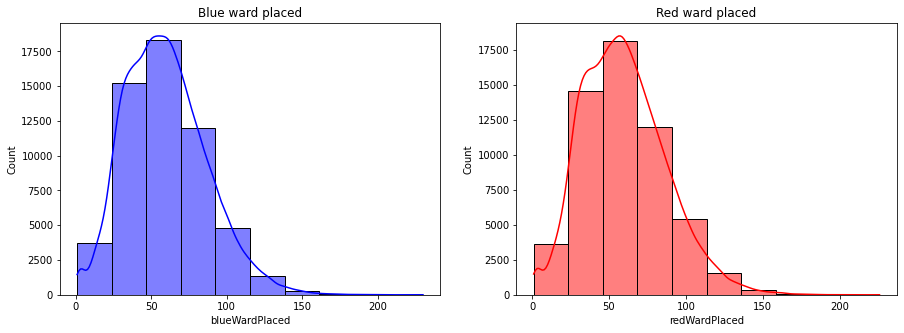

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df.blueWardPlaced, bins=10, kde=True, color="blue").set_title('Blue ward placed')
plt.subplot(1,2,2)
sns.histplot(df.redWardPlaced, bins=10, kde=True, color="red").set_title('Red ward placed')


Text(0.5, 1.0, 'Red ward killed')

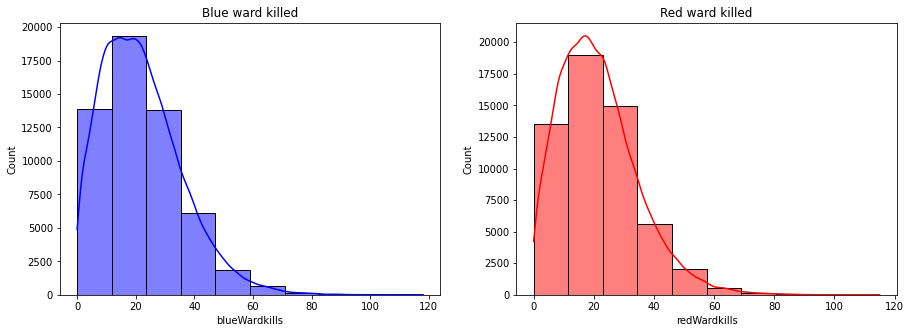

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df.blueWardkills, bins=10, kde=True, color="blue").set_title('Blue ward killed')
plt.subplot(1,2,2)
sns.histplot(df.redWardkills, bins=10, kde=True, color="red").set_title('Red ward killed')


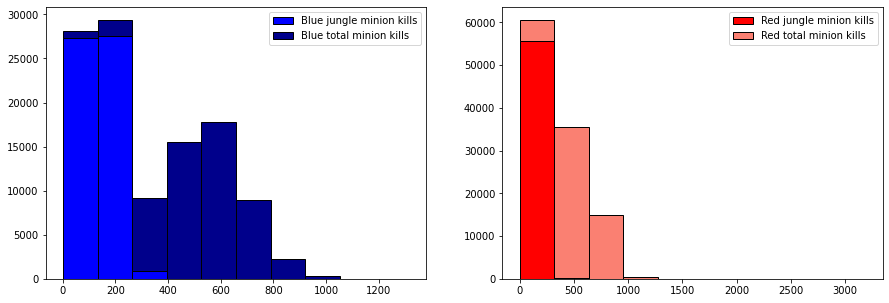

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist([df.blueJungleMinionKills,df.blueTotalMinionKills], stacked=True, ec="k",color=["blue", "darkblue"])
labels= ["Blue jungle minion kills","Blue total minion kills"]
plt.legend(labels)
plt.subplot(1,2,2)
plt.hist([df.redJungleMinionKills,df.redTotalMinionKills], stacked=True, ec="k",color=["red", "salmon"])
labels= ["Red jungle minion kills","Red total minion kills"]
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Red total heal')

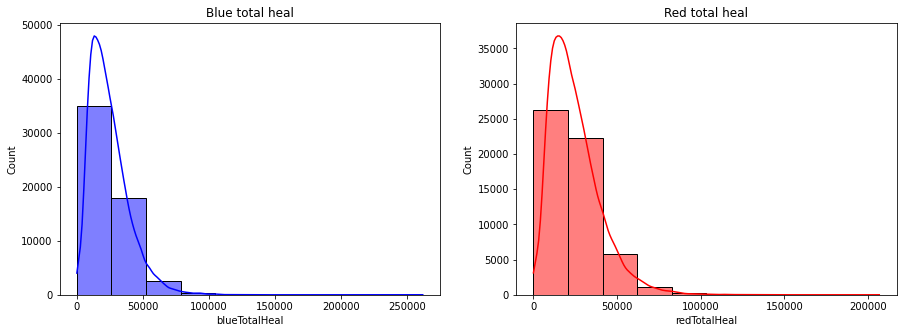

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df.blueTotalHeal, bins=10, kde=True, color="blue").set_title('Blue total heal')
plt.subplot(1,2,2)
sns.histplot(df.redTotalHeal, bins=10, kde=True, color="red").set_title('Red total heal')


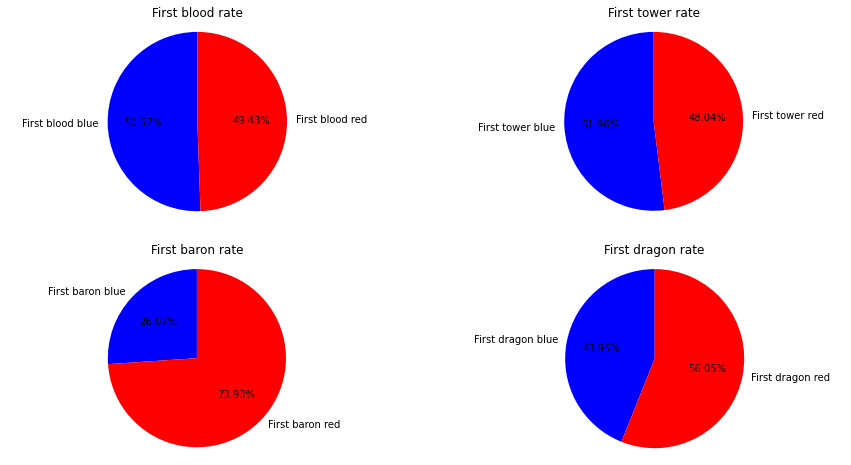

In [30]:
plt.figure(figsize=(15,8))
def pie_plot(column, pos, labels, title):
    plt.subplot(2,2,pos)
    total = len(df)
    left = np.sum(df[column] == BLUE)
    right = np.sum(df[column] == RED)
    left_percent = left/total * 100
    right_percent = right/total * 100
    plt.pie((left_percent,right_percent),
            colors=['blue', 'red'],
            labels = labels,
            startangle = 90,
            wedgeprops = {'linewidth': 3},
            autopct='%.2f%%')
    plt.axis('equal')
    plt.title(title)
pie_plot('bool_FirstBlood', 1, ('First blood blue', 'First blood red'), 'First blood rate')
pie_plot('bool_FirstTower', 2, ('First tower blue', 'First tower red'), 'First tower rate')
pie_plot('bool_FirstBaron', 3, ('First baron blue', 'First baron red'), 'First baron rate')
pie_plot('bool_FirstDragon', 4, ('First dragon blue', 'First dragon red'), 'First dragon rate')


## 3.3 Visualization for relevant and interesting features
We would like to answer the following questions.

**Teams**
* Do blue win more than red?

**Milestones**
* Do first killing a champion increase chance of winning?
* Do first destroying an enemy turret increase chance of winning?
* Do first killing a Baron Nashor increase chance of winning?
* Do first killing a Dragon increase chance of winning?

**Killing abilities**
* Do kill faster increases with time?
* What’s the percentage of kills a team needs to do to win

**Healing**
* Do heal amount increase chance of winning?

### Teams

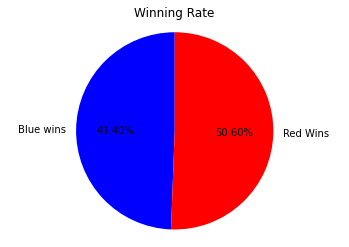

In [31]:
total = len(df)
blue_wins = np.sum(df['bool_win'] == BLUE)
red_wins = np.sum(df['bool_win'] == RED)

blue_wins_percent = blue_wins/total * 100
red_wins_percent = red_wins/total * 100

plt.pie((blue_wins_percent,red_wins_percent),
        colors=['blue', 'red'],
        labels = ('Blue wins', 'Red Wins'),
        startangle = 90,
        autopct='%.2f%%')
plt.axis('equal')
plt.title('Winning Rate')
plt.show()

* Do blue win more than red? Not really

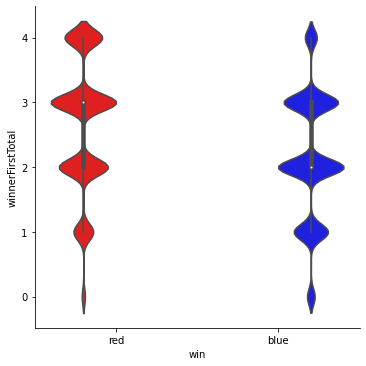

In [32]:
plot = sns.catplot(x='win', y='winnerFirstTotal',
                       hue="win",
                       kind="violin",
                       palette=['red', 'blue'],
                       data=df)

#### Above graph analysis
* When a red team won, they often were the first to do three or more of the following achievements: team got the first kill of an enemy champion, team first destroyed an enemy turret, team first killed Baron Nashor, team first killed a Dragon. Instead, when a blue won, they often did two or three of them.

**Let's see how every milestone impact each of the teams**

### Milestones

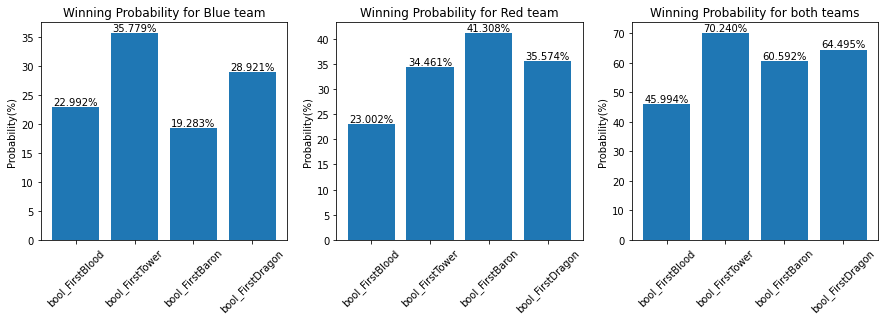

In [33]:
total = len(df.dropna(inplace=False))
milestones_blue = []
milestones_red = []
milestones_both = []
labels = []
for col in milestones_columns:
    labels.append(col)
    milestones_blue.append(np.sum((df['bool_win'] == BLUE) & (df[col] == BLUE))/total * 100)
    milestones_red.append((np.sum((df['bool_win'] == RED) & (df[col] == RED))/total * 100))
    milestones_both.append((np.sum((df['bool_win'] == df[col]))/total * 100))

y_pos = np.arange(len(milestones_columns))
    
fig, ax = plt.subplots(1, 3, figsize=(15,4))

def plot_milestone(idx, src, title):
    ax[idx].bar(y_pos, src, align='center', alpha=1)
    ax[idx].xaxis.set_major_locator(ticker.FixedLocator(y_pos))
    ax[idx].xaxis.set_major_formatter(ticker.FixedFormatter(labels))
    ax[idx].set_ylabel('Probability(%)')
    ax[idx].set_title(title)
    for a,b in zip(y_pos, src):
        ax[idx].text(a, b, '%.3f'%b+'%', ha='center', va= 'bottom')
    plt.setp(ax[idx].get_xticklabels(), rotation=45)

plot_milestone(0, milestones_blue, title='Winning Probability for Blue team')
plot_milestone(1, milestones_red, title='Winning Probability for Red team')
plot_milestone(2, milestones_both, title='Winning Probability for both teams')

pass

* Conclusion: Red team seems to be more impacted on milestones. 

### Killing abilities

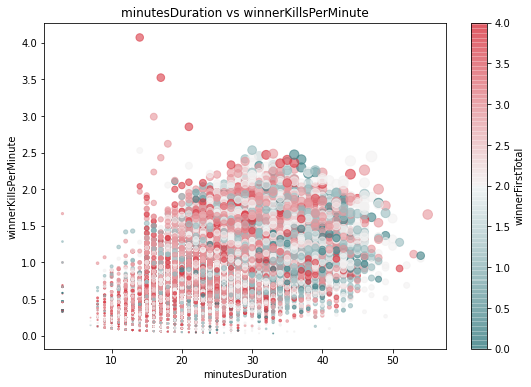

In [34]:
plt.figure(figsize=(9,6))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
plt.scatter(x=df['minutesDuration'], y=df['winnerKillsPerMinute'], s=df['winnerTotalKills'],
                    c=df['winnerFirstTotal'],
                    cmap=cmap, alpha=0.6)
plt.title("minutesDuration vs winnerKillsPerMinute")
plt.xlabel("minutesDuration")
plt.ylabel("winnerKillsPerMinute")
plt.colorbar(label='winnerFirstTotal')


#### Above graph analysis
* We can see in the graph above, that matches were the winner were the first to hit the opponent in any way (kill of an enemy champion, destroyed an enemy turret, killed Baron Nashor or killed a Dragon) were faster.
* Those matches where the winner didn't hit the opponent first in any way were in general longer than 30 minutes.
* Total kills increases with time
* Do kill faster increases with time? Yes, we see that as long as duration increases, the kill rate increases as well

Text(0.5, 1.0, 'Winner kills percentage')

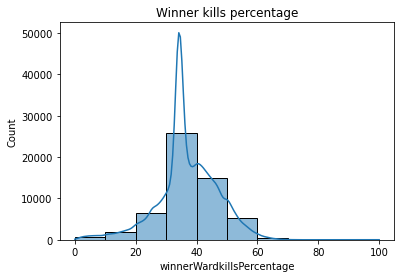

In [35]:
sns.histplot(df.winnerWardkillsPercentage, bins=10, kde=True).set_title('Winner kills percentage')

* What’s the percentage of kills a team needs to do to win? 40% of kills seems to be a good number of kills to win

### Heal

Text(0, 0.5, 'blueTotalHeal')

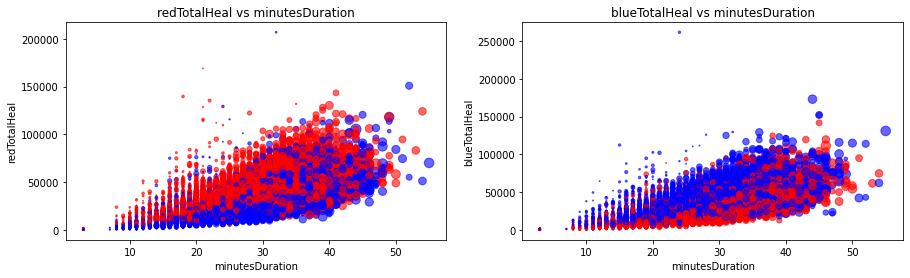

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].scatter(x=df['minutesDuration'], y=df['redTotalHeal'], s=df['winnerTotalKills'],
                    c=df['win'], alpha=0.6)
ax[0].set_title("redTotalHeal vs minutesDuration")
ax[0].set_xlabel("minutesDuration")
ax[0].set_ylabel("redTotalHeal")

ax[1].scatter(x=df['minutesDuration'], y=df['blueTotalHeal'], s=df['winnerTotalKills'],
                    c=df['win'], alpha=0.6)
ax[1].set_title("blueTotalHeal vs minutesDuration")
ax[1].set_xlabel("minutesDuration")
ax[1].set_ylabel("blueTotalHeal")


**Conclusion**: Do heal amount increase chance of winning? Sure it does.

## 4. Classification Model

In [37]:
df = pd.read_csv('lol_resulting_dataset.csv')

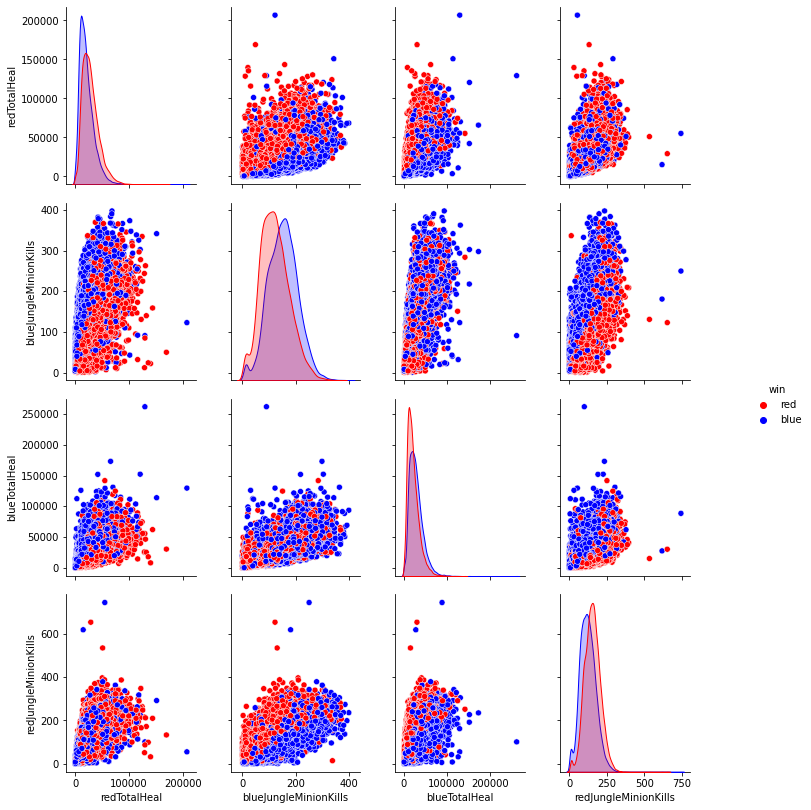

In [38]:
g = sns.pairplot(df[['redTotalHeal', 'blueJungleMinionKills', 'blueTotalHeal', 'redJungleMinionKills', 'win']],
                 hue='win', height=1.5, palette={"blue": "blue", "red":"red"})
g.fig.set_size_inches(12,12)
g

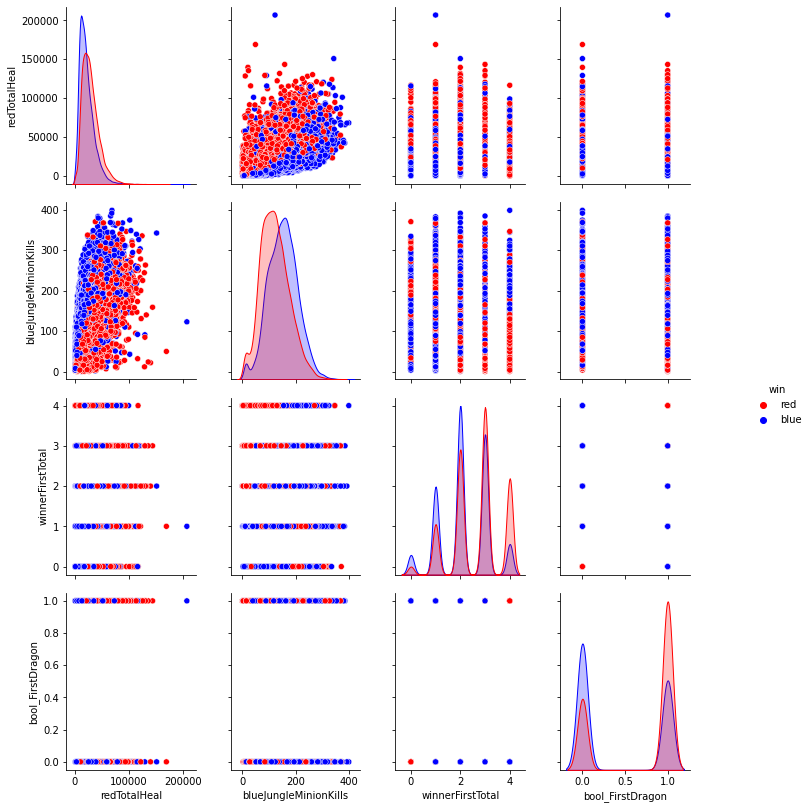

In [39]:
g = sns.pairplot(df[['redTotalHeal', 'blueJungleMinionKills', 'winnerFirstTotal', 'bool_FirstDragon', 'win']],
                 hue='win', palette={"blue": "blue", "red":"red"}, height=1.5)
g.fig.set_size_inches(12,12)
g

The following features show a good split:
1. blueJungleMinionKills vs redTotalHeal
2. redJungleMinionKills vs blueJungleMinionKills
3. blueTotalHeal vs redTotalHeal

### 4.1 Gaussian Naïve Bayes

In [40]:
def check_accuracy(items):
    X = df[items]
    Y = df['win']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,
                                                    random_state=1)

    model = GaussianNB()                       # 2. instantiate model
    model.fit(Xtrain, ytrain)                  # 3. fit model to data
    y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

    ypred = pd.Series(y_model,name="prediction")
    predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
    accuracy = metrics.accuracy_score(ytest, y_model)
    print("{} vs {} accuracy: ".format(items[0], items[1]), accuracy)

check_accuracy(['blueJungleMinionKills', 'redTotalHeal'])
check_accuracy(['redJungleMinionKills', 'blueJungleMinionKills'])
check_accuracy(['blueTotalHeal', 'redTotalHeal'])

blueJungleMinionKills vs redTotalHeal accuracy:  0.7386628428033698
redJungleMinionKills vs blueJungleMinionKills accuracy:  0.7983509589532174
blueTotalHeal vs redTotalHeal accuracy:  0.7491784668698094


We choose redJungleMinionKills vs blueJungleMinionKills because it has the highest accuracy

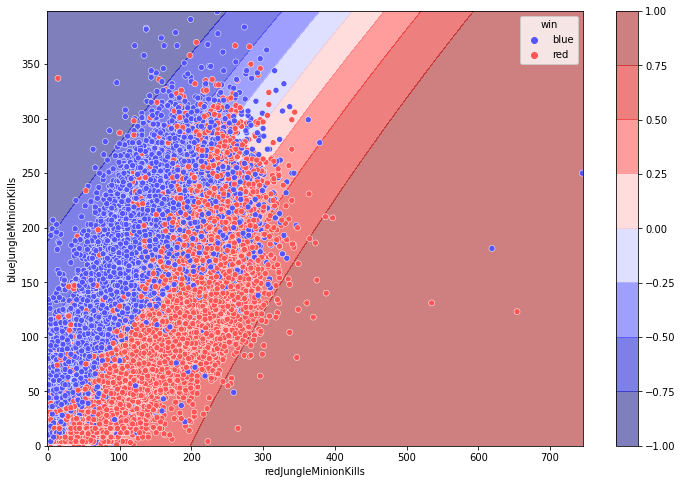

In [41]:
X = df[['redJungleMinionKills', 'blueJungleMinionKills']]
Y = df['win']
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]

    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)
    
    # Train Classifer
    

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()
    return y_pred, y_test


y_pred, y_test = bayes_plot(pd.concat([X,Y],axis=1),spread=1)

### Classification report

In [42]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        blue       0.81      0.78      0.79      8301
         red       0.79      0.82      0.80      8436

    accuracy                           0.80     16737
   macro avg       0.80      0.80      0.80     16737
weighted avg       0.80      0.80      0.80     16737



### 4.2 Decision Tree

**a. Baseline decision tree**

In [43]:
from sklearn.inspection import permutation_importance

def display_trained_tree_with_performance(X, y, depth=None, impurity="gini", print_importance=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test
    clf = DecisionTreeClassifier(max_depth=depth, criterion=impurity)
    clf.fit(X_train,y_train)

    result = permutation_importance(clf, X, y, n_repeats=10,random_state=0)
    importance = sorted(zip(result['importances_mean'], X.columns))
    
    # summarize feature importance
    if print_importance:
        for i,v in importance:
            print('Feature: %s, Score: %.5f' % (v,i))

    #     plt.bar(range(len(X.columns)), result['importances_mean'])
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

        wedges, texts = ax.pie([x[0] for x in importance], wedgeprops=dict(width=0.5), startangle=-40, normalize=True)

        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
                  bbox=bbox_props, zorder=0, va="center")
        labels = [x[1] for x in importance]
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                        horizontalalignment=horizontalalignment, **kw)

        ax.set_title("Column importances")

        plt.show()
    y_pred = clf.predict(X_test)

    print(metrics.classification_report(y_test, y_pred))
    return clf, X

Feature: FirstBlood, Score: 0.01346
Feature: FirstDragon, Score: 0.01499
Feature: blueWardPlaced, Score: 0.02908
Feature: redWardkills, Score: 0.03771
Feature: gameDuraton, Score: 0.05754
Feature: blueWardkills, Score: 0.05823
Feature: redWardPlaced, Score: 0.07330
Feature: redTotalMinionKills, Score: 0.08000
Feature: blueTotalMinionKills, Score: 0.08771
Feature: FirstBaron, Score: 0.10099
Feature: FirstTower, Score: 0.11765
Feature: blueJungleMinionKills, Score: 0.12551
Feature: blueTotalHeal, Score: 0.14465
Feature: redTotalHeal, Score: 0.15133
Feature: redJungleMinionKills, Score: 0.19722


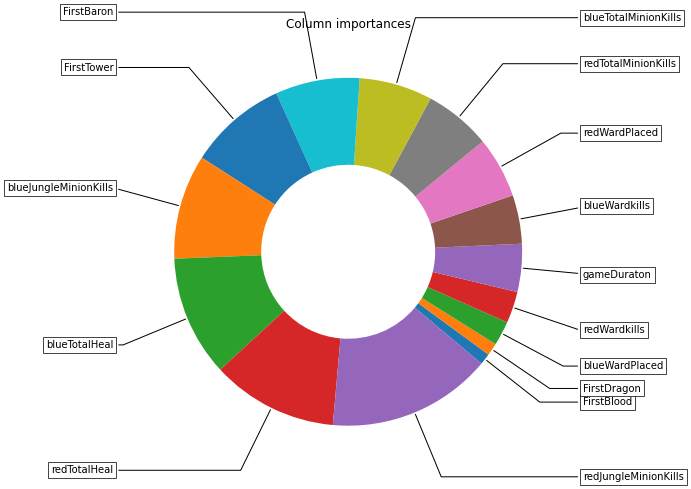

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3104
           1       0.83      0.83      0.83      3189

    accuracy                           0.83      6293
   macro avg       0.83      0.83      0.83      6293
weighted avg       0.83      0.83      0.83      6293



In [44]:
base_df = pd.read_csv('lol3.csv', index_col="gameId")
base_df.dropna(inplace=True)
base_df.replace('Blue', BLUE, inplace=True)
base_df.replace('Red', RED, inplace=True)
_X = base_df.drop(['win'],axis=1)
_y = base_df['win']

clf, X = display_trained_tree_with_performance(_X, _y)

**b. Manipulated decision tree**

Let's see the most important columns

Feature: minutesDuration, Score: 0.00444
Feature: winnerKillsPerMinute, Score: 0.00819
Feature: blueWardPlaced, Score: 0.01745
Feature: blueWardkills, Score: 0.02365
Feature: winnerWardkillsPercentage, Score: 0.02576
Feature: bool_FirstBlood, Score: 0.02603
Feature: winnerTotalKills, Score: 0.02872
Feature: blueTotalMinionKills, Score: 0.03088
Feature: redWardPlaced, Score: 0.03155
Feature: blueTotalHeal, Score: 0.03584
Feature: redWardkills, Score: 0.03850
Feature: bool_FirstDragon, Score: 0.04576
Feature: redTotalMinionKills, Score: 0.05048
Feature: blueJungleMinionKills, Score: 0.06241
Feature: redTotalHeal, Score: 0.06651
Feature: bool_FirstBaron, Score: 0.07598
Feature: redJungleMinionKills, Score: 0.13320
Feature: bool_FirstTower, Score: 0.16413
Feature: winnerFirstTotal, Score: 0.19041


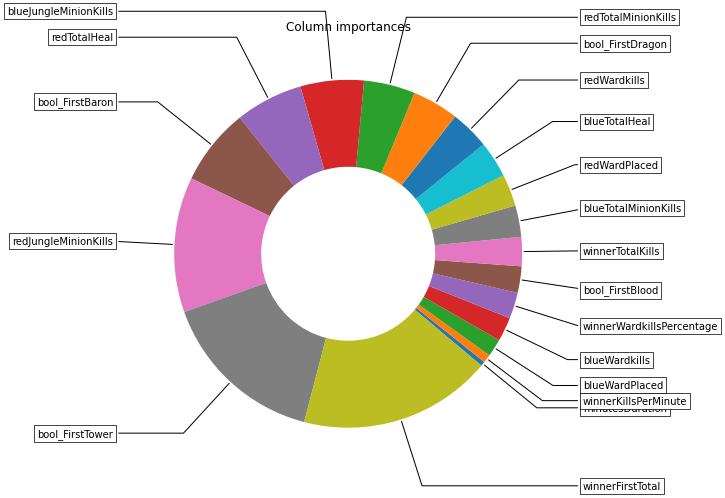

              precision    recall  f1-score   support

        blue       0.92      0.93      0.93      5463
         red       0.93      0.92      0.93      5501

    accuracy                           0.93     10964
   macro avg       0.93      0.93      0.93     10964
weighted avg       0.93      0.93      0.93     10964



In [45]:
df.dropna(inplace=True)
_y = df['win']
_X = df.drop(['win', 'bool_win'],axis=1)
clf, X = display_trained_tree_with_performance(_X, _y)

We take the four most important columns to build a tree

Feature: redJungleMinionKills, Score: 0.13451
Feature: winnerFirstTotal, Score: 0.13747
Feature: bool_FirstTower, Score: 0.17068
Feature: bool_FirstBaron, Score: 0.17870


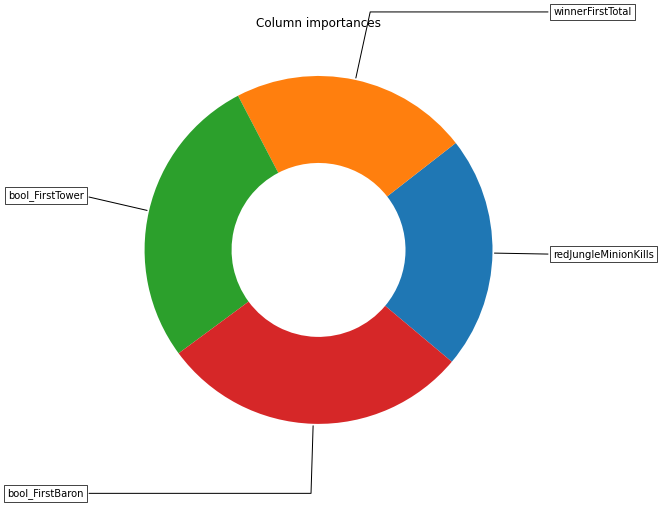

              precision    recall  f1-score   support

        blue       0.88      0.88      0.88      5463
         red       0.88      0.88      0.88      5501

    accuracy                           0.88     10964
   macro avg       0.88      0.88      0.88     10964
weighted avg       0.88      0.88      0.88     10964



In [46]:
_X = df[['redJungleMinionKills', 'bool_FirstTower', 'winnerFirstTotal','bool_FirstBaron']]
clf, X = display_trained_tree_with_performance(_X, _y)

In [47]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import collections
def render_tree(clf, X, file_name, depth=None):
    dot_data=StringIO()
    export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=clf.classes_)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            if "nclass = blue" in dest.get_attributes()['label']:
                dest.set_fillcolor("cornflowerblue")
            else:
                dest.set_fillcolor("salmon")
    
    
    graph.write_png('{}.png'.format(file_name))
    return Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.337009 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.337009 to fit



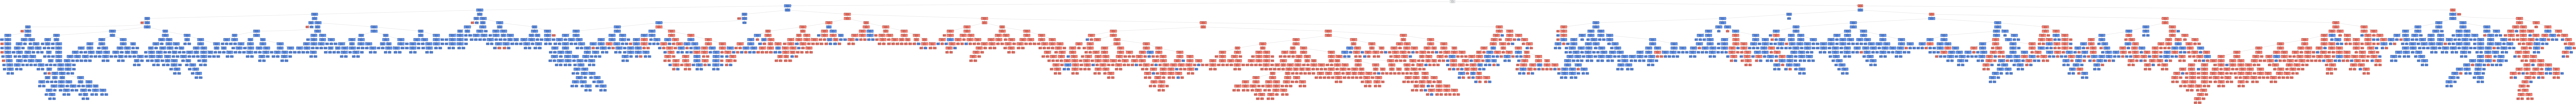

In [48]:
render_tree(clf, X, file_name="ManipulatedDecisionTree")

If we limit the depth to 4, using gini

              precision    recall  f1-score   support

        blue       0.90      0.88      0.89      5463
         red       0.88      0.90      0.89      5501

    accuracy                           0.89     10964
   macro avg       0.89      0.89      0.89     10964
weighted avg       0.89      0.89      0.89     10964



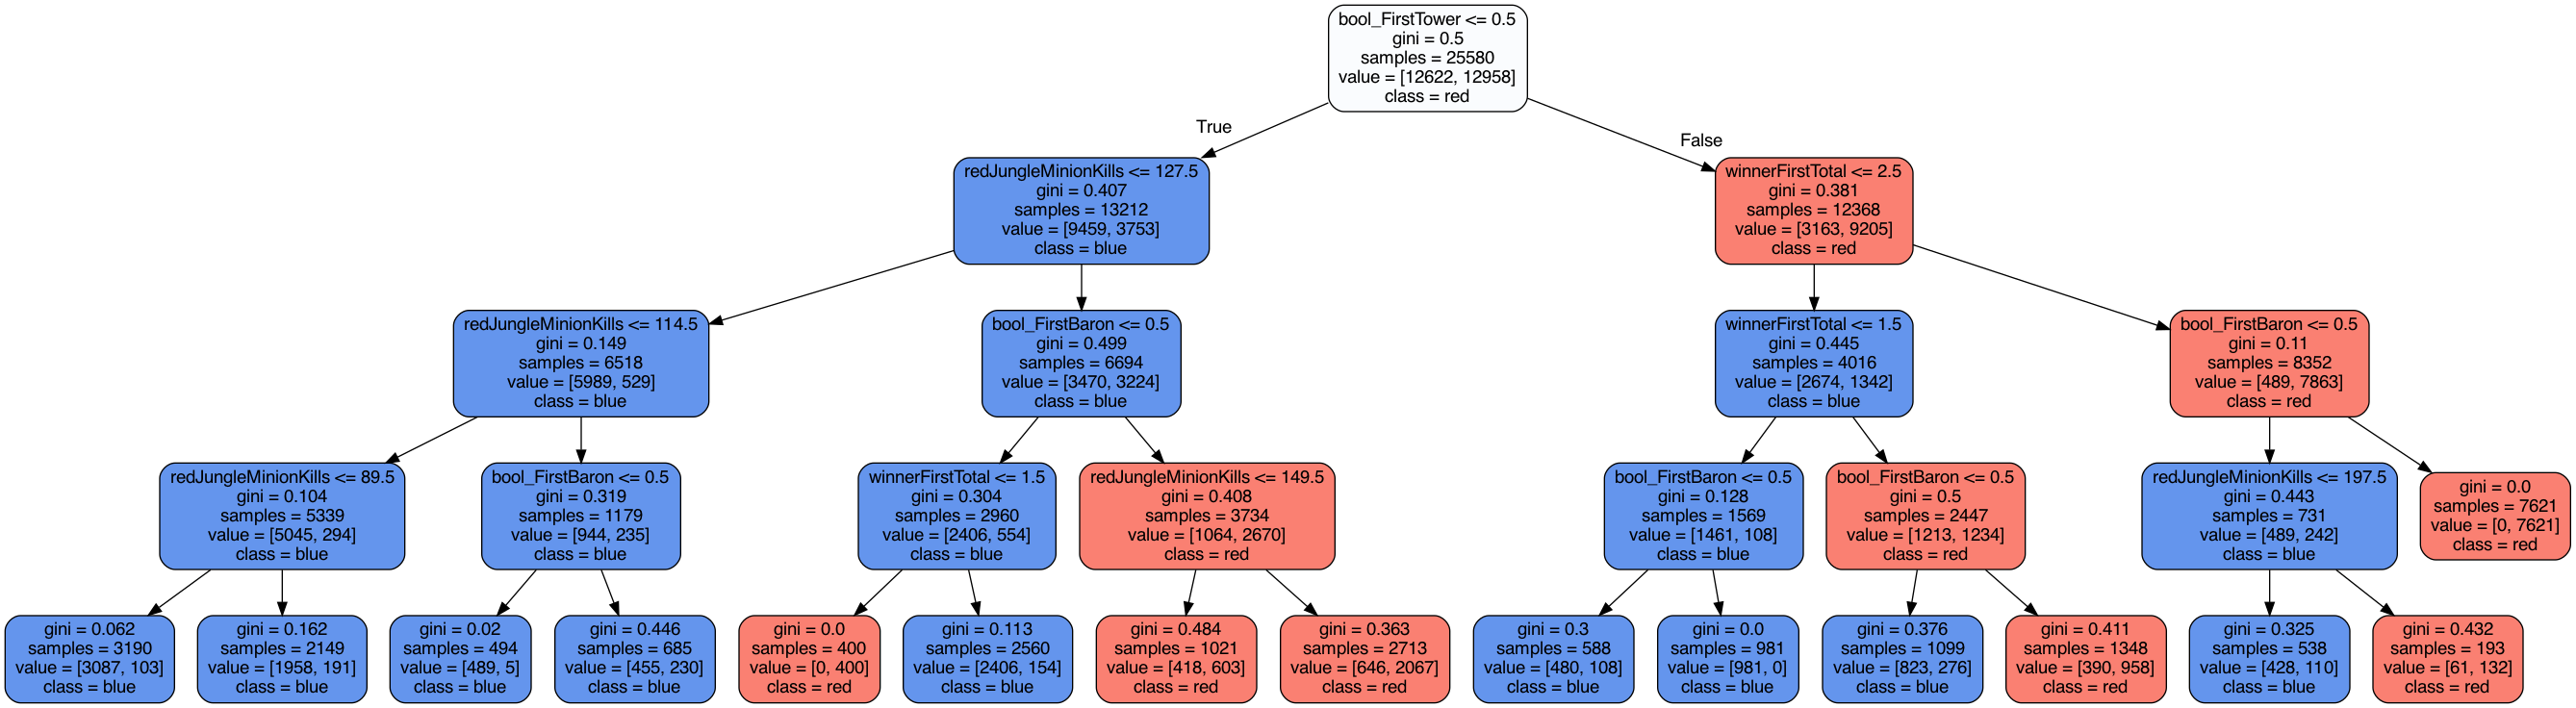

In [49]:
clfDepthFourGini, XDepthFourGini = display_trained_tree_with_performance(_X, _y, depth=4, impurity="gini", print_importance=False)
render_tree(clfDepthFourGini, XDepthFourGini, file_name="ManipulatedDecisionTreeDepthFourGini")

If we limit the depth to 4, but now using entropy

              precision    recall  f1-score   support

        blue       0.90      0.88      0.89      5463
         red       0.88      0.90      0.89      5501

    accuracy                           0.89     10964
   macro avg       0.89      0.89      0.89     10964
weighted avg       0.89      0.89      0.89     10964



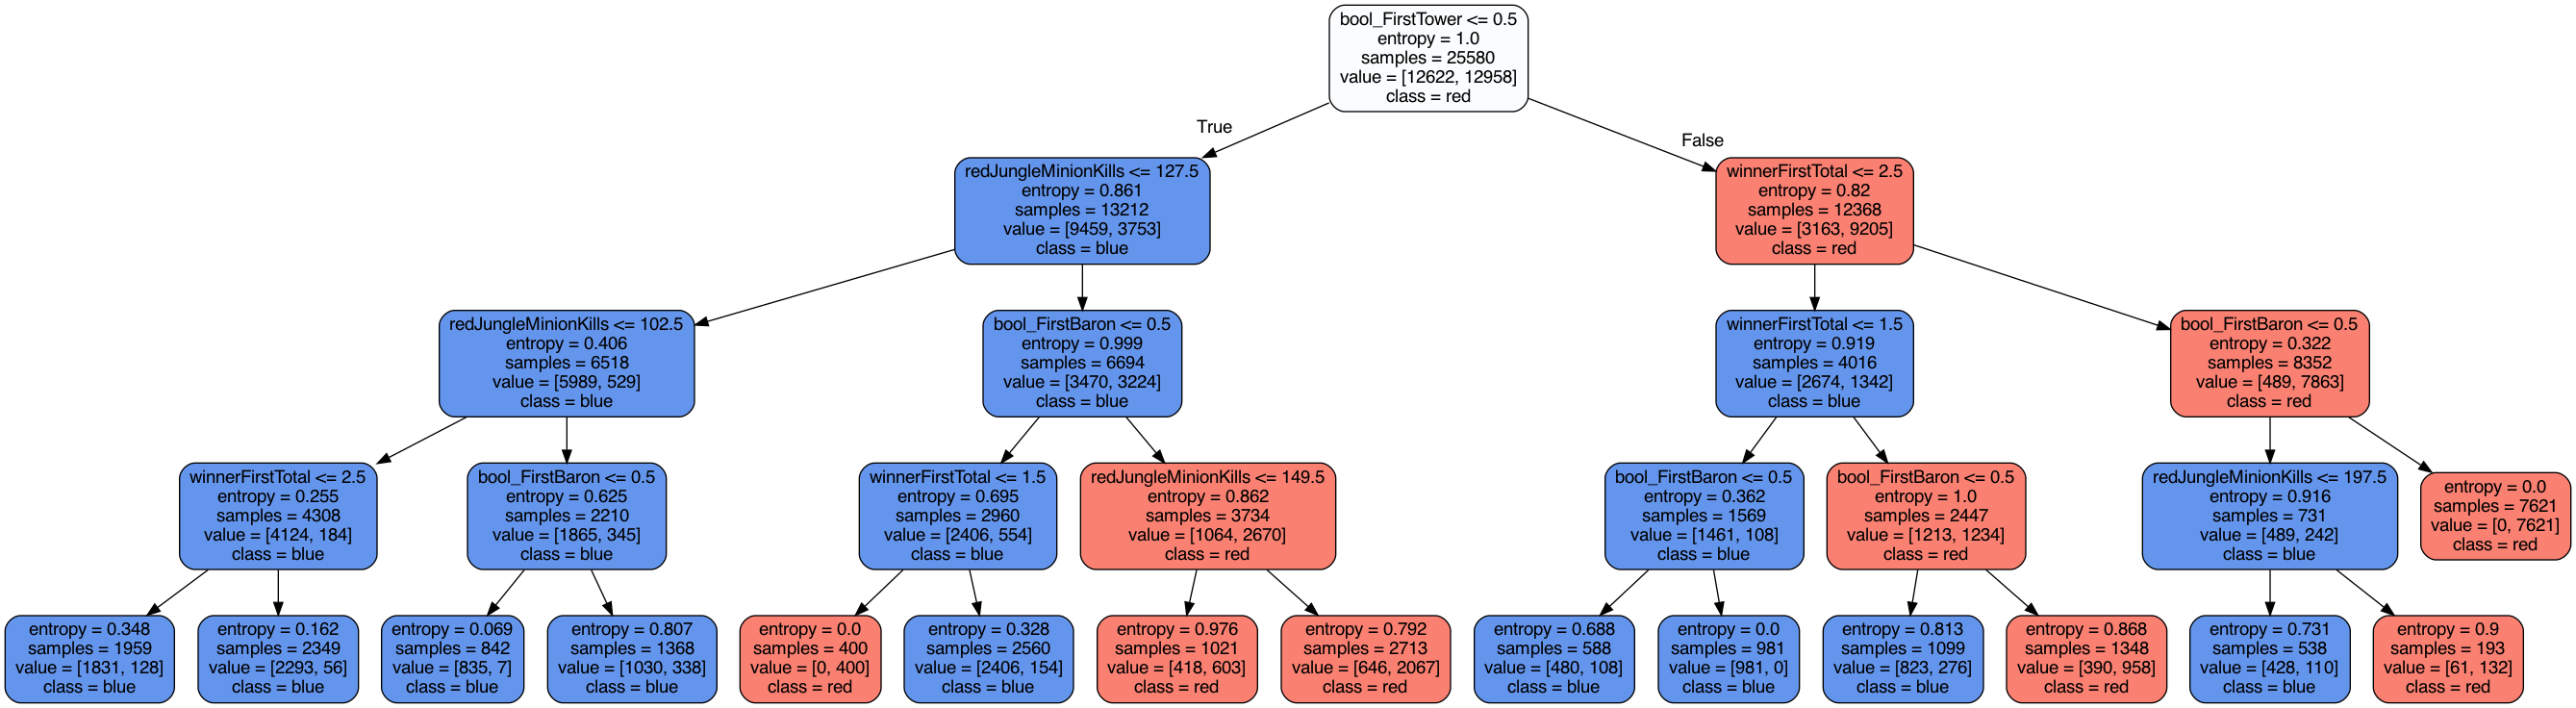

In [50]:
clfDepthFourEntropy, XDepthFourEntropy = display_trained_tree_with_performance(_X, _y, depth=4, impurity="entropy", print_importance=False)
render_tree(clfDepthFourEntropy, XDepthFourEntropy, file_name="ManipulatedDecisionTreeDepthFourEntropy")

**Conclusion:** We see an increase of 0.06 in the accuracy of the manipulated model using only 4 features: 0.82 vs 0.88. Entropy or gini impurity measurements have not done the difference. 
Using depth of 4 gave us a similar accuracy than not limiting the depth at all.

## 5. Summary

**Review of results**

Cleaning of the data was not easy, but it was pretty much well resolved. Some columns were created in order to analyze the dataset and to create the models. Every feature was analyzed and some relation between them as well. The pivot tables created were added to display that the numerical features increases with the game duration. Both GNB and Decision trees models were created and correctly displayed. Decision trees were created using max-depth to avoid overfitting, and two different impurity criterions were used to compare. In general, class colors were used to give a better look to the notebook. 

**Issues encountered**
* The lack of knowledge about the dataset topic what the first obstacle
* We had multiple NA and 0 values that we needed to replace. If not, our dataset would be reduced to a third.

**Insights from the analysis**
* Red team uses more heals than blue team
* Red use to kill first the Baron Neshor
* Blue's victories usually don't require getting all the milestones (fist of ..) while red victories usually requires more than two.
* Kill rate increases with time
* When the winner did not hit the opponent first, the match was longer than 30 min.
* When the winner hit the opponent first, the match tended to be shorter.
* The general number of kill rate is 40%
* Using more heals during the match increases chance of winning.

**Which classification performance measure best fits data set**
In our case, the accuracy is a suitable measure because, as we saw, we have equal proportion of blue or red wins. Also, the model is not related to any critical topic (where we'd prefeer precision) or any security topic (where we'd prefeer recall)